In [95]:
#Importamos las librerias
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import fiona 
from shapely.geometry import Point
import folium
from IPython.display import display, HTML
import matplotlib.colors as mcolors


gdf_overlay_1 = gpd.read_file("C:/Users/giuli/OneDrive/Escritorio/Trabajo Final/zonas_inundables_saladillo.gml") 


In [96]:
df=pd.read_excel('https://raw.githubusercontent.com/BiancaDiFranco/M-todosOP/main/Trabajo%20final/Rosario%20F.xlsx', engine='openpyxl')
secciones=gpd.read_file('https://github.com/BiancaDiFranco/M-todosOP/raw/refs/heads/main/Trabajo%20final/datasets%20complementarios/secciones_catastrales.gml')
distritos=gpd.read_file('https://github.com/BiancaDiFranco/M-todosOP/raw/refs/heads/main/Trabajo%20final/datasets%20complementarios/distritos_descentralizados.gml')
barrios=gpd.read_file('https://github.com/BiancaDiFranco/M-todosOP/raw/refs/heads/main/Trabajo%20final/datasets%20complementarios/barrios.gml')

In [97]:

geometry = [Point(xy) for xy in zip(df['Coord1__Longitude'], df['Coord1__Latitude'])]
gdf_points = gpd.GeoDataFrame(df, geometry=geometry)
gdf_points.set_crs('EPSG:4326', inplace=True)
print(gdf_points)



    interview__key METODO  Coord1__Latitude  Coord1__Longitude      EDAD  \
0      56-56-25-81    F2F        -32.881458         -60.695274  56 y mas   
1      67-96-98-06    F2F        -32.882259         -60.693571   36 a 45   
2      24-21-01-39    F2F        -32.884731         -60.692882  56 y mas   
3      84-96-80-81    F2F        -32.884673         -60.693464   26 a 35   
4      21-29-79-64    F2F        -32.918833         -60.703628   36 a 45   
..             ...    ...               ...                ...       ...   
367   347615540259    IVR        -32.941000         -60.688295  56 y mas   
368   347615540658    IVR        -32.970114         -60.653051   16 a 25   
369   347615672682    IVR        -32.907759         -60.752721  56 y mas   
370   348715470373    IVR        -32.942161         -60.639935  56 y mas   
371   387154502466    IVR        -32.957100         -60.637709  56 y mas   

        GENERO INT DE VOTO X ESPACIO      RADIO                     geometry  
0    Mas

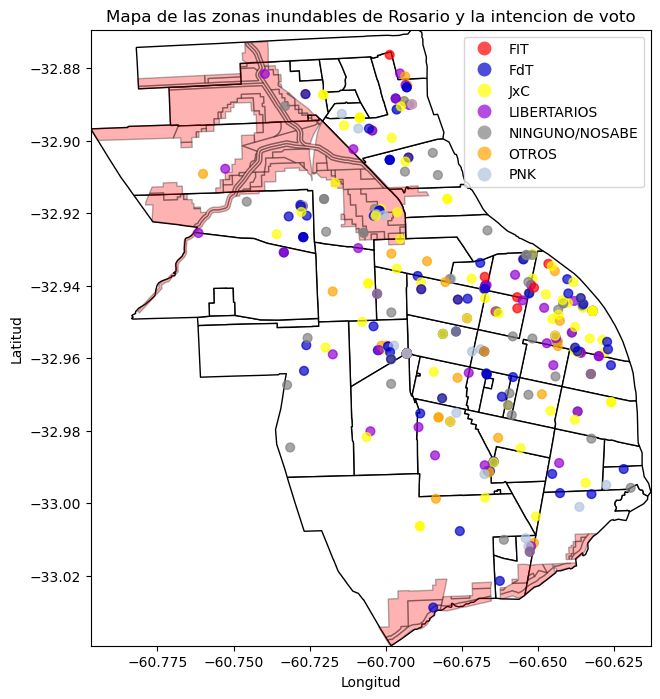

In [98]:

#Ingreso el mapa de Rosario y filtro los puntos para tener solo los que estan dentro del mapa
map_rosario = gpd.read_file("C:/Users/giuli/OneDrive/Escritorio/Trabajo Final/barrios.gml")
gdf_points_in_area = gdf_points[gdf_points.geometry.within(map_rosario.unary_union)]

#Grafico el mapa que muestra las zonas inundables de Rosario y la intencion de voto
fig, ax = plt.subplots(figsize=(10, 8))
map_rosario.plot(ax=ax, color='white', edgecolor='black')
gdf_overlay_1.plot(ax=ax, color='red', edgecolor='black', alpha=0.3)
if map_rosario.crs != gdf_points.crs:
    gdf_points = gdf_points.to_crs(map_rosario.crs)
cmap = mcolors.ListedColormap(['red', 'mediumblue', 'yellow', 'darkviolet', 'grey', 'orange', 'lightsteelblue'])
gdf_points_in_area.plot(ax=ax, column='INT DE VOTO X ESPACIO', cmap= cmap, markersize=40, legend=True, alpha=0.7)
ax.set_xlim([map_rosario.total_bounds[0], map_rosario.total_bounds[2]])  # Ajustar límites X
ax.set_ylim([map_rosario.total_bounds[1], map_rosario.total_bounds[3]])  # Ajustar límites Y
ax.set_title("Mapa de las zonas inundables de Rosario y la intencion de voto")
ax.set_xlabel("Longitud")
ax.set_ylabel("Latitud")
plt.show()